# NLP Practice Set

In [146]:
# pip install language-tool-python
# !pip install pandas numpy
# !pip install wordcloud
# !pip install afinn

In [2]:
import re
import nltk
import spacy
from afinn import Afinn
import pandas as pd
import numpy as np
from nltk import pos_tag
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
import language_tool_python
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('average_perception_tagger')
NLP = spacy.load('en_core_web_sm')

In [3]:
corpus = (""" 1245 Tech billionaire Elon Musk has flagged a "massive DDOS attack" on X that disrupted the airing of his interview with former Donald Trump. Musk was set to interview Trump this morning, marking his return to the microblogging platform ahead of the US Presidential elections due in November.
        In the worst case, the Tesla chief said, the platform would allow only a small number of live listeners and later post the conversation online.
        "There appears to be a massive DDOS attack on X. Working on shutting it down. Worst case, we will proceed with a smaller number of live listeners and post the conversation later," the Tesla chief said in a post as the interview missed its scheduled timing.
        What is DDOS attack?
        DDOS attack stands for "Distributed Denial-of-Service Attack" that is disrupts a targeted server or network's normal traffic by flooding the target or its surrounding infrastructure with internet traffic.
        Cybersecurity firm Fortinet has termed it a cybercrime. Read more
        "DDoS Attack means 'Distributed Denial-of-Service (DDoS) Attack' and it is a cybercrime in which the attacker floods a server with internet traffic to prevent users from accessing connected online services and sites," according to the firm.""")

# Data Cleaning 

In [6]:
corpus = corpus.lower()
print(corpus)

 1245 tech billionaire elon musk has flagged a "massive ddos attack" on x that disrupted the airing of his interview with former donald trump. musk was set to interview trump this morning, marking his return to the microblogging platform ahead of the us presidential elections due in november.
        in the worst case, the tesla chief said, the platform would allow only a small number of live listeners and later post the conversation online.
        "there appears to be a massive ddos attack on x. working on shutting it down. worst case, we will proceed with a smaller number of live listeners and post the conversation later," the tesla chief said in a post as the interview missed its scheduled timing.
        what is ddos attack?
        ddos attack stands for "distributed denial-of-service attack" that is disrupts a targeted server or network's normal traffic by flooding the target or its surrounding infrastructure with internet traffic.
        cybersecurity firm fortinet has termed 

In [7]:
pattern = re.compile(r'[^\w\s]')
corpus = pattern.sub('', corpus)
print(corpus)

 1245 tech billionaire elon musk has flagged a massive ddos attack on x that disrupted the airing of his interview with former donald trump musk was set to interview trump this morning marking his return to the microblogging platform ahead of the us presidential elections due in november
        in the worst case the tesla chief said the platform would allow only a small number of live listeners and later post the conversation online
        there appears to be a massive ddos attack on x working on shutting it down worst case we will proceed with a smaller number of live listeners and post the conversation later the tesla chief said in a post as the interview missed its scheduled timing
        what is ddos attack
        ddos attack stands for distributed denialofservice attack that is disrupts a targeted server or networks normal traffic by flooding the target or its surrounding infrastructure with internet traffic
        cybersecurity firm fortinet has termed it a cybercrime read m

In [9]:
pattern = re.compile(r'[\d]')
corpus = pattern.sub('', corpus)
print(corpus)

  tech billionaire elon musk has flagge a massive os attack on x that isrupte the airing of his interview with former onal trump musk was set to interview trump this morning marking his return to the microblogging platform ahea of the us presiential elections ue in november
        in the worst case the tesla chief sai the platform woul allow only a small number of live listeners an later post the conversation online
        there appears to be a massive os attack on x working on shutting it own worst case we will procee with a smaller number of live listeners an post the conversation later the tesla chief sai in a post as the interview misse its scheule timing
        what is os attack
        os attack stans for istribute enialofservice attack that is isrupts a targete server or networks normal traffic by flooing the target or its surrouning infrastructure with internet traffic
        cybersecurity firm fortinet has terme it a cybercrime rea more
        os attack means istribute en

# Tokenization

In [10]:
tokens = corpus.split()
print(tokens)

['tech', 'billionaire', 'elon', 'musk', 'has', 'flagge', 'a', 'massive', 'os', 'attack', 'on', 'x', 'that', 'isrupte', 'the', 'airing', 'of', 'his', 'interview', 'with', 'former', 'onal', 'trump', 'musk', 'was', 'set', 'to', 'interview', 'trump', 'this', 'morning', 'marking', 'his', 'return', 'to', 'the', 'microblogging', 'platform', 'ahea', 'of', 'the', 'us', 'presiential', 'elections', 'ue', 'in', 'november', 'in', 'the', 'worst', 'case', 'the', 'tesla', 'chief', 'sai', 'the', 'platform', 'woul', 'allow', 'only', 'a', 'small', 'number', 'of', 'live', 'listeners', 'an', 'later', 'post', 'the', 'conversation', 'online', 'there', 'appears', 'to', 'be', 'a', 'massive', 'os', 'attack', 'on', 'x', 'working', 'on', 'shutting', 'it', 'own', 'worst', 'case', 'we', 'will', 'procee', 'with', 'a', 'smaller', 'number', 'of', 'live', 'listeners', 'an', 'post', 'the', 'conversation', 'later', 'the', 'tesla', 'chief', 'sai', 'in', 'a', 'post', 'as', 'the', 'interview', 'misse', 'its', 'scheule', 'ti

# Stop Word Removal

In [25]:
stop_words = set(stopwords.words('english'))

In [26]:
tokens = [token for token in tokens if token not in stop_words]
display(tokens)

['tech',
 'billionaire',
 'elon',
 'musk',
 'flagged',
 'massive',
 'ddos',
 'attack',
 'x',
 'disrupted',
 'airing',
 'interview',
 'former',
 'donald',
 'trump',
 'musk',
 'set',
 'interview',
 'trump',
 'morning',
 'marking',
 'return',
 'microblogging',
 'platform',
 'ahead',
 'us',
 'presidential',
 'elections',
 'due',
 'november',
 'worst',
 'case',
 'tesla',
 'chief',
 'said',
 'platform',
 'would',
 'allow',
 'small',
 'number',
 'live',
 'listeners',
 'later',
 'post',
 'conversation',
 'online',
 'appears',
 'massive',
 'ddos',
 'attack',
 'x',
 'working',
 'shutting',
 'worst',
 'case',
 'proceed',
 'smaller',
 'number',
 'live',
 'listeners',
 'post',
 'conversation',
 'later',
 'tesla',
 'chief',
 'said',
 'post',
 'interview',
 'missed',
 'scheduled',
 'timing',
 'ddos',
 'attack',
 'ddos',
 'attack',
 'stands',
 'distributed',
 'denialofservice',
 'attack',
 'disrupts',
 'targeted',
 'server',
 'networks',
 'normal',
 'traffic',
 'flooding',
 'target',
 'surrounding',
 

In [30]:
stemmer = PorterStemmer()
stemmed_corpus = [stemmer.stem(token) for token in tokens]
print(stemmed_corpus)

['tech', 'billionair', 'elon', 'musk', 'flag', 'massiv', 'ddo', 'attack', 'x', 'disrupt', 'air', 'interview', 'former', 'donald', 'trump', 'musk', 'set', 'interview', 'trump', 'morn', 'mark', 'return', 'microblog', 'platform', 'ahead', 'us', 'presidenti', 'elect', 'due', 'novemb', 'worst', 'case', 'tesla', 'chief', 'said', 'platform', 'would', 'allow', 'small', 'number', 'live', 'listen', 'later', 'post', 'convers', 'onlin', 'appear', 'massiv', 'ddo', 'attack', 'x', 'work', 'shut', 'worst', 'case', 'proceed', 'smaller', 'number', 'live', 'listen', 'post', 'convers', 'later', 'tesla', 'chief', 'said', 'post', 'interview', 'miss', 'schedul', 'time', 'ddo', 'attack', 'ddo', 'attack', 'stand', 'distribut', 'denialofservic', 'attack', 'disrupt', 'target', 'server', 'network', 'normal', 'traffic', 'flood', 'target', 'surround', 'infrastructur', 'internet', 'traffic', 'cybersecur', 'firm', 'fortinet', 'term', 'cybercrim', 'read', 'ddo', 'attack', 'mean', 'distribut', 'denialofservic', 'ddo', 

In [32]:
lemmatizer = WordNetLemmatizer()

In [51]:
nltk.pos_tag(['men'])[0][1][0].upper()

'N'

In [62]:
nltk.pos_tag(['man'])[0][1][0]

'N'

In [89]:
def get_pos_tag(token):
    tag = nltk.pos_tag([token])[0][1][0].upper()
    return {
        'J': wordnet.ADJ,
        'N': wordnet.NOUN,
        'V': wordnet.VERB,
        'R': wordnet.ADV
    }.get(tag, wordnet.NOUN)

def lemmatize_text(text):
    return [lemmatizer.lemmatize(token, get_pos_tag(token)) for token in tokens]

In [87]:
tokens

['tech',
 'billionaire',
 'elon',
 'musk',
 'flagged',
 'massive',
 'ddos',
 'attack',
 'x',
 'disrupted',
 'airing',
 'interview',
 'former',
 'donald',
 'trump',
 'musk',
 'set',
 'interview',
 'trump',
 'morning',
 'marking',
 'return',
 'microblogging',
 'platform',
 'ahead',
 'us',
 'presidential',
 'elections',
 'due',
 'november',
 'worst',
 'case',
 'tesla',
 'chief',
 'said',
 'platform',
 'would',
 'allow',
 'small',
 'number',
 'live',
 'listeners',
 'later',
 'post',
 'conversation',
 'online',
 'appears',
 'massive',
 'ddos',
 'attack',
 'x',
 'working',
 'shutting',
 'worst',
 'case',
 'proceed',
 'smaller',
 'number',
 'live',
 'listeners',
 'post',
 'conversation',
 'later',
 'tesla',
 'chief',
 'said',
 'post',
 'interview',
 'missed',
 'scheduled',
 'timing',
 'ddos',
 'attack',
 'ddos',
 'attack',
 'stands',
 'distributed',
 'denialofservice',
 'attack',
 'disrupts',
 'targeted',
 'server',
 'networks',
 'normal',
 'traffic',
 'flooding',
 'target',
 'surrounding',
 

In [91]:
lemmatized_tokens = lemmatize_text(tokens)
print(lemmatized_tokens)

['tech', 'billionaire', 'elon', 'musk', 'flag', 'massive', 'ddos', 'attack', 'x', 'disrupt', 'air', 'interview', 'former', 'donald', 'trump', 'musk', 'set', 'interview', 'trump', 'morning', 'mark', 'return', 'microblogging', 'platform', 'ahead', 'u', 'presidential', 'election', 'due', 'november', 'bad', 'case', 'tesla', 'chief', 'say', 'platform', 'would', 'allow', 'small', 'number', 'live', 'listener', 'later', 'post', 'conversation', 'online', 'appear', 'massive', 'ddos', 'attack', 'x', 'work', 'shut', 'bad', 'case', 'proceed', 'small', 'number', 'live', 'listener', 'post', 'conversation', 'later', 'tesla', 'chief', 'say', 'post', 'interview', 'miss', 'schedule', 'timing', 'ddos', 'attack', 'ddos', 'attack', 'stand', 'distribute', 'denialofservice', 'attack', 'disrupts', 'target', 'server', 'network', 'normal', 'traffic', 'flood', 'target', 'surround', 'infrastructure', 'internet', 'traffic', 'cybersecurity', 'firm', 'fortinet', 'term', 'cybercrime', 'read', 'ddos', 'attack', 'mean',

# Similarity Checker

In [94]:
word1 = "car"
word2 = "engine"

In [97]:
wordnet.synsets("car")[0]

Synset('car.n.01')

In [98]:
def checkSimilarity(word1, word2):
    synset1 = wordnet.synsets(word1)[0]
    synset2 = wordnet.synsets(word2)[0]
    return synset1.wup_similarity(synset2)

In [102]:
checkSimilarity("headlight", "engine")

0.7

In [104]:
def checkSentenceSimilarity(sent1, sent2):
    doc1 = NLP(sent1)
    doc2 = NLP(sent2)
    return doc1.similarity(doc2)

In [105]:
checkSentenceSimilarity("The cat is pet", "The car is vehicle")

C:\Users\Asif Sayyed\AppData\Local\Temp\ipykernel_3732\3253313484.py:4: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  return doc1.similarity(doc2)


0.7428161160983641

In [109]:
def checkGrammer(text):
    tool = language_tool_python.LanguageTool('en-US')
    print("Original:", text)
    print(f"Corrected: {tool.correct(text)}")

In [110]:
checkGrammer("I is a boy")

Original: I is a boy
Corrected: I am a boy


# TFIDF

In [112]:
documents = [
    "Machine learning is a field of artificial intelligence",
    "Natural language processing is a subfield of machine learning",
    "Machine learning algorithms can be used for various tasks",
    "Artificial intelligence encompasses machine learning and more"
]

In [115]:
count_vectorizer = CountVectorizer()

In [126]:
term_document_matrix = count_vectorizer.fit_transform(documents)

In [132]:
tdm_df = pd.DataFrame(term_document_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())
display(tdm_df)

,algorithms,and,artificial,be,can,encompasses,field,for,intelligence,is,...,learning,machine,more,natural,of,processing,subfield,tasks,used,various
0,0,0,1,0,0,0,1,0,1,1,...,1,1,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,1,1,0,1,1,1,1,0,0,0
2,1,0,0,1,1,0,0,1,0,0,...,1,1,0,0,0,0,0,1,1,1
3,0,1,1,0,0,1,0,0,1,0,...,1,1,1,0,0,0,0,0,0,0


In [133]:
tfidf_transformer = TfidfTransformer()

In [134]:
tfidf_matrix = tfidf_transformer.fit_transform(term_document_matrix)

In [137]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())

In [138]:
display(tfidf_df)

,algorithms,and,artificial,be,can,encompasses,field,for,intelligence,is,...,learning,machine,more,natural,of,processing,subfield,tasks,used,various
0,0.000000,0.000000,0.392687,0.000000,0.000000,0.000000,0.498073,0.000000,0.392687,0.392687,...,0.259915,0.259915,0.000000,0.000000,0.392687,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.327714,...,0.216911,0.216911,0.000000,0.415664,0.327714,0.415664,0.415664,0.000000,0.000000,0.000000
2,0.364067,0.000000,0.000000,0.364067,0.364067,0.000000,0.000000,0.364067,0.000000,0.000000,...,0.189985,0.189985,0.000000,0.000000,0.000000,0.000000,0.000000,0.364067,0.364067,0.364067
3,0.000000,0.457016,0.360316,0.000000,0.000000,0.457016,0.000000,0.000000,0.360316,0.000000,...,0.238490,0.238490,0.457016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Word Cloud

In [143]:
word_frequenmncyu = Counter(tokens)

(-0.5, 799.5, 399.5, -0.5)

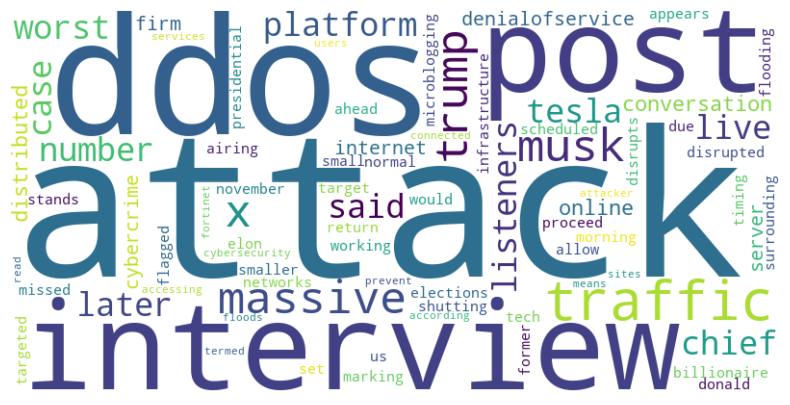

In [144]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequenmncyu)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Sentimental Analysis

In [148]:
corpus = ("I absolutely love this movie. The acting was amazing. And I enjoyed every minute.")

In [149]:
afinn = Afinn()

In [161]:
def get_score(text: str) -> tuple[str, float]:
    score = afinn.score(text)
    if score > 0:
        return 'Positive', score
    elif score < 0:
        return 'Negative', score
    else:
        return 'Neutral', score

In [160]:
get_score("i kiss Pranjal")

('Positive', 2.0)